# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain, combinations

# Import Data

In [2]:
df_path = "C:/Users/Yi Ting/Desktop/TOTO analysis/toto.csv"
df = pd.read_csv(df_path, header = 0)

df.head()

,Date,Num_1,Num_2,Num_3,Num_4,Num_5,Num_6,Bonus
0,13.01.2020,2,3,4,13,16,33,14
1,09.01.2020,12,24,34,38,46,47,28
2,06.01.2020,2,7,11,15,29,47,33
3,03.01.2020,13,15,21,23,30,35,25
4,30.12.2019,3,12,13,35,36,40,33


## Data Cleaning

1. Change Date datatype string to datetime
2. There was a change in Toto rule on 2014-10-07.
   Check date range to ensure it would not affect
   the analysis of the result. 
   - The data starts from 2014-11-13, hence all data follows the same rule
3. Check for missing data
   - No missing data
4. Check for data error (e.g. > 49 or 0)
    - No data error
5. Check for repeated number in a single draw
    - After a number appear, the ball would be removed
    - Thus, repeated number are likely a data entry error
    - Result: There is repeat no.48 on 2018-10-18 (index 462)
    - Since it is only 1 entry, dropping the data would not affect the analysis
   

In [3]:
######### Part 1 ###############
#Checking data types are correct
#Result - need to change Date column from string to datetime
################################

df.dtypes


Date     object
Num_1     int64
Num_2     int64
Num_3     int64
Num_4     int64
Num_5     int64
Num_6     int64
Bonus     int64
dtype: object

In [4]:
#Change date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

#sort by date in ascending order
df.sort_values(by=['Date'], inplace=True, ignore_index=True)

#Check result after change
print(df.dtypes)
df.head()

Date     datetime64[ns]
Num_1             int64
Num_2             int64
Num_3             int64
Num_4             int64
Num_5             int64
Num_6             int64
Bonus             int64
dtype: object


,Date,Num_1,Num_2,Num_3,Num_4,Num_5,Num_6,Bonus
0,2014-11-13,9,15,17,23,27,49,3
1,2014-11-17,2,10,11,15,40,46,8
2,2014-11-20,2,3,5,19,25,36,16
3,2014-11-24,4,6,14,20,36,43,35
4,2014-11-27,5,9,18,28,44,49,24


In [5]:
######### Part 2 ###############
#Check date range
#Result - Data is from 2014-11-13 to 2020-01-13 
#No issue 
###############################

print(max(df['Date']))
print(min(df['Date']))

2020-01-13 00:00:00
2014-11-13 00:00:00


In [6]:
######### Part 3 ###############
#Check for missing data
#Result: No missing data
###############################

df.isna().sum()

Date     0
Num_1    0
Num_2    0
Num_3    0
Num_4    0
Num_5    0
Num_6    0
Bonus    0
dtype: int64

In [7]:
######### Part 4 ######################
#Check for data error 
# e.g. out of range data >49 or 0
# Result - no data error
#######################################

cols = df.columns[1:]
for col in cols: 
    for i in range(len(df)):
        if df[col][i] > 49 or df[col][i] == 0:
            print(str([col]) + " index: " + str([i]))
    else:
        print(str(col) + ' No data error')

Num_1 No data error
Num_2 No data error
Num_3 No data error
Num_4 No data error
Num_5 No data error
Num_6 No data error
Bonus No data error


In [8]:
######### Part 5 ########################
# Duplicate winning number in single draw
#########################################

#loop through each row to check
for row in range(len(df)):
    #If count of unique number not equal 6 num + bonus = 7,
    #implies there is duplicate
    curr = df.iloc[row, 1:8]
    if len(set(curr)) != 7: 
        print("There is duplicate")
        print(df.iloc[row])

#drop index 462
df.drop(index=462, axis=0, inplace=True)
       

There is duplicate
Date     2018-10-18 00:00:00
Num_1                      5
Num_2                     14
Num_3                     17
Num_4                     31
Num_5                     48
Num_6                     48
Bonus                     47
Name: 462, dtype: object


## Feature Engineering 

1. Add 'Weekday' column to indicate if the draw is on Monday or Thursday
    - Require data cleaning for Sunday and Friday data (no draw on these days) 
    - Drop 2016-12-15, Friday (index 269). There are Thursday and following Monday data
    - Drop 2018-07-08, Sunday (index 432). There are Thursday and following Monday data
    - Replace the rest of Friday data to Thursday. Missing Thursday data entry 

In [9]:
######### Part 1 ######################
#Add Weekday column 
#Data clean Friday and Sunday data 
#######################################

#create new weekday column 
df['Weekday'] = df['Date'].apply(lambda x: x.strftime('%A'))
df.head()

,Date,Num_1,Num_2,Num_3,Num_4,Num_5,Num_6,Bonus,Weekday
0,2014-11-13,9,15,17,23,27,49,3,Thursday
1,2014-11-17,2,10,11,15,40,46,8,Monday
2,2014-11-20,2,3,5,19,25,36,16,Thursday
3,2014-11-24,4,6,14,20,36,43,35,Monday
4,2014-11-27,5,9,18,28,44,49,24,Thursday


In [10]:
#Check for unique data
#Result-There are Sunday and Friday data
#Expecting only Monday and Thursday data
print(set(df['Weekday']))

#data that contains Friday and Sunday
print(df[df['Weekday'].isin(['Friday', 'Sunday'])])

#Separate Friday and Sunday data
Friday = df[df['Weekday'].isin(['Friday'])]
Sunday = df[df['Weekday'].isin(['Sunday'])]


{'Friday', 'Sunday', 'Thursday', 'Monday'}
          Date  Num_1  Num_2  Num_3  Num_4  Num_5  Num_6  Bonus Weekday
30  2015-02-27      2     13     19     28     41     42     14  Friday
132 2016-02-19     16     18     20     21     27     49     23  Friday
269 2016-12-16      4     10     22     23     40     42      7  Friday
285 2017-02-10      2      7     24     27     29     34     21  Friday
379 2018-01-05      3      4     13     19     23     47      5  Friday
389 2018-02-09      8     15     16     23     40     49     18  Friday
395 2018-03-02     24     28     31     37     40     49     29  Friday
432 2018-07-08      9     11     22     23     24     29     49  Sunday
486 2019-01-11      1      2     13     18     41     47     46  Friday
492 2019-02-01      5     11     16     17     22     27     10  Friday
497 2019-02-22      5      8     14     16     34     39     23  Friday
585 2020-01-03     13     15     21     23     30     35     25  Friday


In [11]:
#Check if there are data before/after Sunday 
#There are data on Thursday and following monday. Drop Sunday 
print(Sunday.index) #index: 432
print(df.iloc[429:435])

#Drop Sunday, index 432
df.drop([432], inplace=True)

Int64Index([432], dtype='int64')
          Date  Num_1  Num_2  Num_3  Num_4  Num_5  Num_6  Bonus   Weekday
429 2018-06-28      2      7     22     27     40     47     48  Thursday
430 2018-07-02     12     13     26     33     35     38     23    Monday
431 2018-07-05      8     11     28     30     32     34     39  Thursday
432 2018-07-08      9     11     22     23     24     29     49    Sunday
433 2018-07-09      6     23     31     38     39     43     33    Monday
434 2018-07-12      4     15     25     32     40     41     10  Thursday


In [12]:
#Check if there are data before Friday
#Get the index of data before Friday 
bef_fri_ind = list((Friday.index) - 1)
print(Friday.index)
print(bef_fri_ind)

#Before Friday data 
before_fri = df.iloc[bef_fri_ind]
print(before_fri)

#There are no prior Thursday data except for 2016-12-15
#Drop 2016-12-15, Friday (index 269) data where there is already a Thursday data
df.drop([269], inplace=True)

#Change rest of weekday Friday to Thursday
df['Weekday'].replace({'Friday': 'Thursday'},inplace = True)


Int64Index([30, 132, 269, 285, 379, 389, 395, 486, 492, 497, 585], dtype='int64')
[29, 131, 268, 284, 378, 388, 394, 485, 491, 496, 584]
          Date  Num_1  Num_2  Num_3  Num_4  Num_5  Num_6  Bonus   Weekday
29  2015-02-23      1      5     14     18     24     26     29    Monday
131 2016-02-15      3      5     29     40     43     49     21    Monday
268 2016-12-15      4     18     24     39     46     47     10  Thursday
284 2017-02-06      9     14     17     25     30     36     44    Monday
378 2018-01-01      3      9     16     34     45     46     49    Monday
388 2018-02-05     25     33     38     40     42     48     27    Monday
394 2018-02-26      4      9     13     15     40     44     48    Monday
487 2019-01-14     10     13     21     27     34     40     41    Monday
493 2019-02-04      6     15     21     30     46     47     34    Monday
498 2019-02-25      9     12     27     28     38     44     10    Monday
586 2020-01-06      2      7     11     15     29

In [13]:
#Final check all Weekday entries are Monday and Thursday
print(set(df['Weekday']))

{'Thursday', 'Monday'}


## Analysis

## 1. Which are the most common winning numbers?

In [14]:
#Create a new frame with winning number 1 to 49
value = pd.Series(range(1,50), name='Num')
all_value = pd.DataFrame(data={'Num':value})
all_value.head()

,Num
0,1
1,2
2,3
3,4
4,5


In [15]:
#specify draw columns - num_1 to bonus 
draw_col = df.columns[1:-1].values.tolist()

#function to count value of multiple column
def count_col(df,col,new_df):
    """ 
    Count occurance of 1-49 for each column.
    Add total column
    Return a new dataframe with count for each column and total
    
    """
    for c in col:
        count = pd.DataFrame(df[c].value_counts()).reset_index()
        new_df = new_df.merge(count, how='outer', left_on = 'Num', right_on = 'index')
       
    new_col = col.copy()
    new_col.append('Num') #include column num 1-49 in new_df
    new_df = new_df[new_col].fillna(0) #there are certain numbers with no count
    new_df['Total'] = new_df[col].sum(axis=1) #sum Num_1 to bonus count
    new_df = new_df.astype(int) #whole number format
    return new_df

#Use count_col function
draw_count = count_col(df, draw_col, all_value)
draw_count.set_index('Num', inplace=True) #set num 1-49 as index
draw_count



C:\Users\Yi Ting\AppData\Local\Temp\ipykernel_31652\3040139109.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df = new_df.merge(count, how='outer', left_on = 'Num', right_on = 'index')
C:\Users\Yi Ting\AppData\Local\Temp\ipykernel_31652\3040139109.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df = new_df.merge(count, how='outer', left_on = 'Num', right_on = 'index')


,Num_1,Num_2,Num_3,Num_4,Num_5,Num_6,Bonus,Total
Num,,,,,,,,
1,72,0,0,0,0,0,12,84
2,75,7,0,0,0,0,16,98
3,56,16,0,0,0,0,13,85
4,46,21,5,0,0,0,7,79
5,53,20,5,0,0,0,7,85
6,48,32,3,0,0,0,13,96
7,36,23,6,1,0,0,11,77
8,39,23,10,2,0,0,13,87
9,28,36,12,1,0,0,7,84


In [16]:
#Find the mean of total occurance. Result: 84
draw_count["Total"].mean()

83.71428571428571

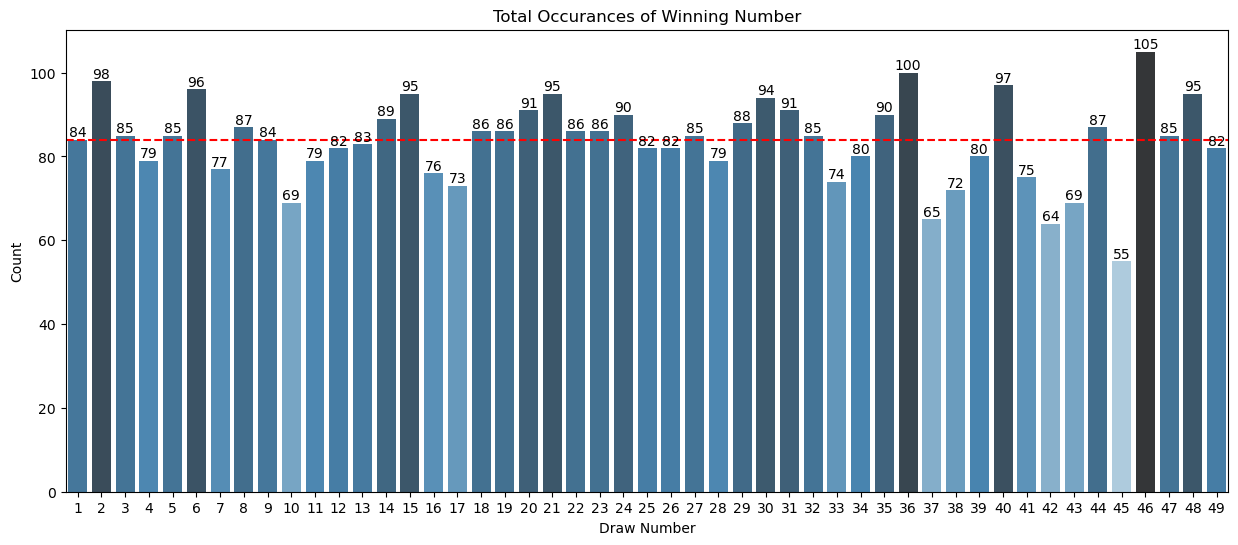

In [17]:
#Plot bar chart
#plot size
f, ax = plt.subplots(figsize = (15,6))

#For colour range 
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

#Bar plot
sns.barplot(x= draw_count.index, y = 'Total', 
            data = draw_count, palette=colors_from_values(draw_count['Total'], 'Blues_d'))

#Add count label 
ax.bar_label(ax.containers[0])


#Add labels, Title
_ = plt.title("Total Occurances of Winning Number")
_ = plt.xlabel("Draw Number")
_ = plt.ylabel("Count")


#Add average line 
_ = plt.axhline(84, color='r', ls='--', label='label')


In [18]:
#Table to sort highest occurance to lowest
draw_count_sort = draw_count.sort_values(by=['Total'], ascending=False)

#add column calculate frequency of occurance
#frequence = no.occured/total draw
#total draw = 586
draw_count_sort["Frequency"] = round(draw_count_sort['Total']/len(df),3)
draw_count_sort[['Total', 'Frequency']]

,Total,Frequency
Num,,
46,105,0.179
36,100,0.171
2,98,0.167
40,97,0.166
6,96,0.164
15,95,0.162
48,95,0.162
21,95,0.162
30,94,0.160


## 2. Does the most common winning numbers differ between Monday and Thursday Draw? 


In [19]:
#split Monday and Thurs data in individual df
Mon = df[df['Weekday'] == 'Monday']
Thur = df[df['Weekday'] == 'Thursday']

#use previous definited function count_col 
#and empty all_vaue (num1-49) dataframe 
Mon_count = count_col(Mon, draw_col, all_value)
Thur_count = count_col(Thur, draw_col, all_value)



C:\Users\Yi Ting\AppData\Local\Temp\ipykernel_31652\3040139109.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df = new_df.merge(count, how='outer', left_on = 'Num', right_on = 'index')
C:\Users\Yi Ting\AppData\Local\Temp\ipykernel_31652\3040139109.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df = new_df.merge(count, how='outer', left_on = 'Num', right_on = 'index')
C:\Users\Yi Ting\AppData\Local\Temp\ipykernel_31652\3040139109.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df = new_df.merge(count, how='outer', left_on = 'Num', right_on = 'index')
C:\Users\Yi Ting\AppData\Local\Temp\ipykernel_31652\3040139109.py:14: FutureWarning: Pas

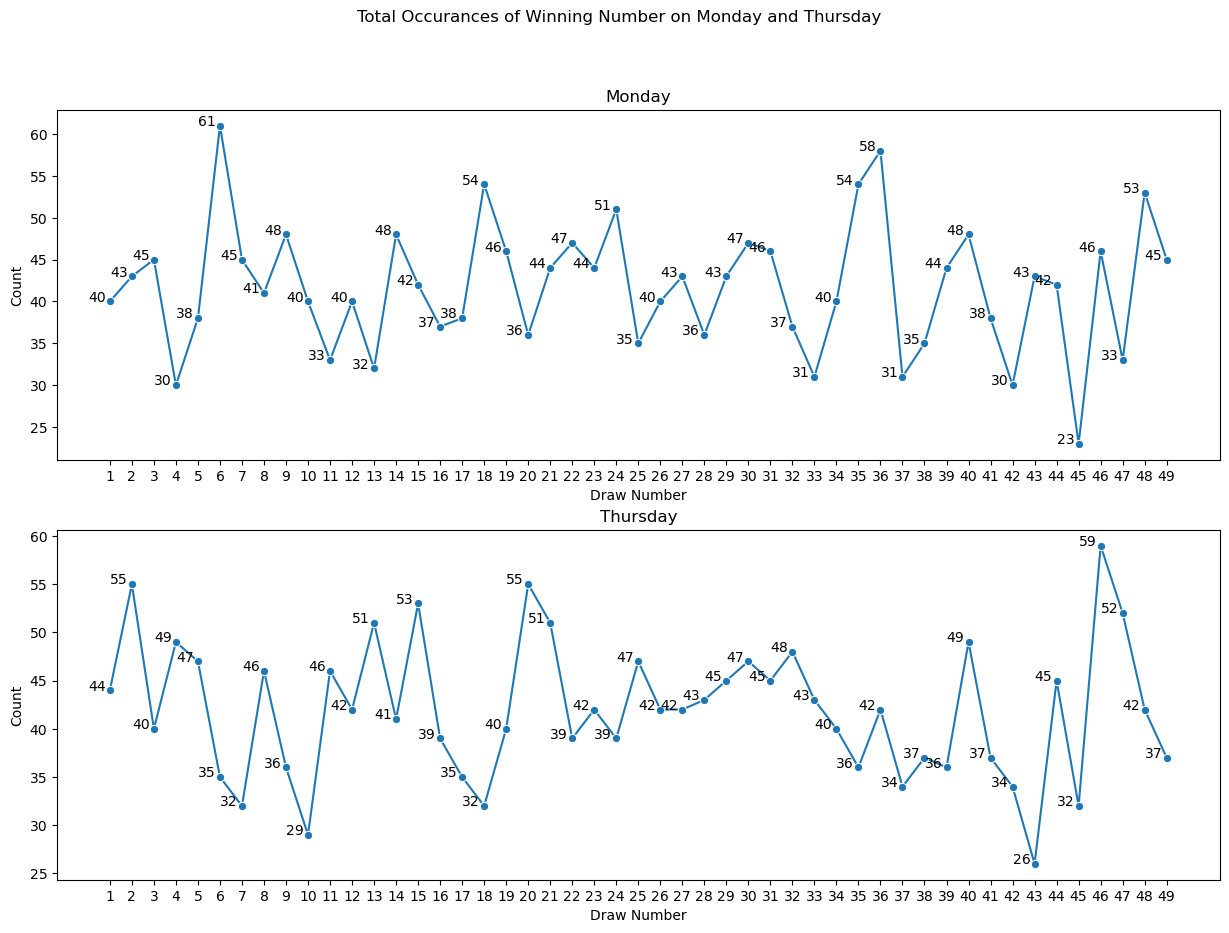

In [20]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 1)

#create boxplot in each subplot
sns.lineplot(x = 'Num', y = "Total", data=Mon_count, marker="o", ax=axes[0])
sns.lineplot(x = 'Num', y = "Total", data=Thur_count, marker="o", ax=axes[1])

#Set plot size 
plt.gcf().set_size_inches(15, 10)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'left')

fig.suptitle("Total Occurances of Winning Number on Monday and Thursday")           
        
#first subplot
plt.sca(axes[0]) 
_ = plt.xticks(Mon_count['Num']) #Show all x index
#call addlabel function to add y value above marker
addlabels(Mon_count['Num'],Mon_count['Total']) 
#x,y label
_ = plt.xlabel("Draw Number")
_ = plt.ylabel("Count")
#Add Title to indicate Monday
_ = plt.title("Monday")   


#second subplot
plt.sca(axes[1])
_ = plt.xticks(Thur_count['Num'])
addlabels(Thur_count['Num'],Thur_count['Total'])
_ = plt.xlabel("Draw Number")
_ = plt.ylabel("Count")
#Add Title to indicate Thursday
_ = plt.title("Thursday")   



## 3. Which numbers that appeared in a previous draw is also likely to be in the next draw? 

In [21]:
#use the previous empty all_value dataframe containing draw number 1-49
#add a new column and fill with zero
all_value["Count"] = 0

#Create an empty dictionary with draw number as key and set all count to zero
counter = dict(zip(all_value.Num, all_value.Count))

In [22]:
#For loop to count if number appeared in prev draw

for i in range(len(df)-1):
    prev = list(df.iloc[i,1:7])
    nex = list(df.iloc[i+1,1:7])  
    for num in nex:
        if num in prev:
            counter[num] += 1
            

#Convert dictionary to dataframe
prev_count = pd.DataFrame.from_dict(counter, orient='index').reset_index() 
prev_count.columns = ['Num','Count']
prev_count.head()


,Num,Count
0,1,21
1,2,19
2,3,15
3,4,16
4,5,13


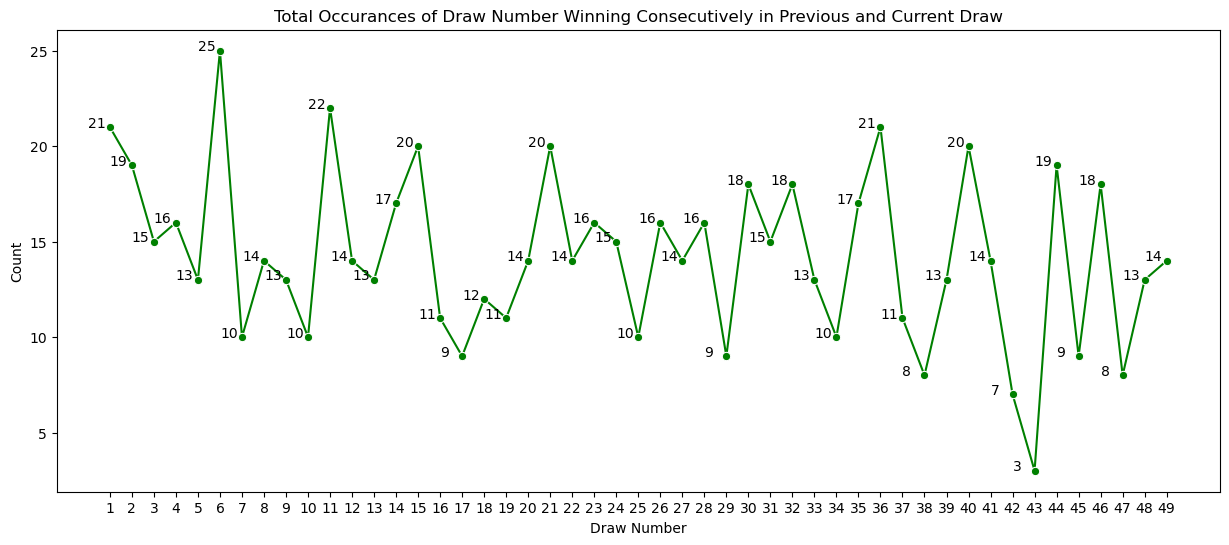

In [23]:
#Plotsize
f, ax = plt.subplots(figsize = (15,6))

#Lineplot 
sns.lineplot(x = 'Num', y = 'Count', data = prev_count, marker="o", color='g')

#show all x values
_ = plt.xticks(prev_count['Num']) #Show all x index

#call addlabel function to add y value above marker
addlabels(prev_count['Num'],prev_count['Count']) 

#x,y label
_ = plt.xlabel("Draw Number")
_ = plt.ylabel("Count")
#Add Title to indicate Monday
_ = plt.title("Total Occurances of Draw Number Winning Consecutively in Previous and Current Draw")   



In [24]:
#merge previous top 12 common number with prev_count column
#reset index for mering for draw_count
draw_count_sort.rename_axis('Draw_Num').reset_index(inplace=True)
total_prev_count = draw_count_sort.merge(prev_count, how='left', on="Num")
total_prev_count = total_prev_count[["Num","Total", "Frequency","Count"]]
total_prev_count.columns = ["Num", "Total", "Frequency","Prev_Count"]
total_prev_count.head(12)

,Num,Total,Frequency,Prev_Count
0,46,105,0.179,18
1,36,100,0.171,21
2,2,98,0.167,19
3,40,97,0.166,20
4,6,96,0.164,25
5,15,95,0.162,20
6,48,95,0.162,13
7,21,95,0.162,20
8,30,94,0.160,18
9,31,91,0.155,15


## 4. Which pair is likely to appear in a draw?

In [25]:
#list of num 1-49
all_num = list(range(1,50))

#Function 
def pair_count(df):
    """ Pair up 1-49 number as dictionary """
    #get a pair list in dictionary
    pair = Counter(chain.from_iterable(combinations(df, 2) for line in df))
    #reset all dict value to zero
    pair = dict.fromkeys(pair, 0)
    return pair

#Create empty dictionary with pair 1-49
pair_dict = pair_count(all_num)

In [26]:
#For loop to count if a pair of number appeared
for i in range(len(df)):
    #get row in asecending order
    draw = sorted(list(df.iloc[i,1:8]))
    curr_pair = pair_count(draw) #get pair in dict
    curr_pair_key = list(curr_pair.keys()) #pairs in list
    for pair in curr_pair_key:
        pair_dict[pair]+=1

            

In [27]:
#Convert dictionary to dataframe
pair_df = pd.DataFrame.from_dict(pair_dict, orient='index').reset_index() 

#split pair index into individual column
pair_df["num1"] = pair_df["index"].apply(lambda x: x[0])
pair_df["num2"] = pair_df["index"].apply(lambda x: x[1])
pair_df.columns = ['Pair', 'Count', 'Pair_1', 'Pair_2']

pair_df[['Pair','Count']].sort_values(by=['Count'],ascending=False).head(15)

,Pair,Count
775,"(21, 27)",22
550,"(14, 19)",21
567,"(14, 36)",20
469,"(11, 46)",20
811,"(22, 36)",20
60,"(2, 15)",20
967,"(29, 31)",20
821,"(22, 46)",20
354,"(8, 48)",20
352,"(8, 46)",20
